<!--Información del curso-->
<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">

<center><h1 style="font-size:2em;color:#2467C0">  Caso de estudio </h1></center>

<center><h4 style="font-size:2em;color:#840700">  Pasajeros del Titanic  </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/titanic.jpg" align="middle" style="width:500px"/></td>
<td align="left-align">

EL **Titanic** fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. Solo sobrevivieron 711 de las 2208 personas que iban a bordo (contando pasajeros y tripulación)

En este ejemplo, analizaremos información de los pasajeros del Titanic utilizando la librerá Pandas.

    
<br>
</td>
</tr>
</table>

# Librerías

Cargamos las bibliotecas que necesitamos 

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize


# Cargamos los datos

In [2]:
#Leer el archivo datos/titanic.csv


Descripción de las columnas : 
* Survival - Supervivencia  (0 = No; 1 = Si).  
* Pclass - Clase (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Nombre
* Sex - Sexo
* Age - Edad
* Sibsp - Número de hermanos / cónyuges a bordo
* Parch - Número de padres / niños a bordo
* Ticket - Número de ticket
* Fare - Tarifa 
* Cabin - Número de cabina
* Embarked - Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
import csv 

my_file = os.getcwd() +  '/datos/BACK_titanic.csv'


In [4]:
titanic_data = {'PassengerId' : [], 'Survived': [], 'Pclass': [], 'Name': [], 'Sex': [], 'Age': [], 'SibSp': [], 'Parch': [], 'Ticket': [], 'Fare': [], 'Cabin': [], 'Embarked': []}

with open(my_file, newline='') as csvfile:
    data = csv.DictReader(csvfile)
    print(data.fieldnames)
    for row in data:
       for key in row:
           titanic_data[key].append(row[key])



['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


<div class="alert alert-info">
 <ul>
  <li>Encuentre el número de pasajeros</li>
</ul> 

</div>

<div class="alert alert-success">
 <ul>
  Para el numero de personas vamos a contar el numero total de nombres que hay, pues como vemos en la lista anteriorm esta columna no tiene valores nulos 
</ul> 

</div>

In [5]:
num_pass = 0

for i in titanic_data['Name']:
    num_pass =  num_pass + 1

num_pass

891

<div class="alert alert-info">
 <ul>
  <li>Encuentre el número de sobrevivientes</li>
</ul> 

</div>

In [6]:
only_survivors =  0

for i in titanic_data['Survived']:
    if i == '1':
        only_survivors = only_survivors + 1

only_survivors

342

<div class="alert alert-info">
 <ul>
  <li>Encuentre el numero de pasajeros por clase </li>
</ul> 

</div>

In [7]:
contador_C1=0
contador_C2=0
contador_C3=0

for i in titanic_data['Pclass']:
    if i == '1':
        contador_C1 = contador_C1 + 1
    if i == '2':
        contador_C2 = contador_C2 + 1
    if i == '3':
        contador_C3 = contador_C3 + 1

contador_C1, contador_C2, contador_C3


(216, 184, 491)

<div class="alert alert-info">
 <ul>
  <li>Encuentre el numero de pasajeros que tengan como nombre o apellido el string 'William'</li>
</ul> 

</div>

In [8]:
count_William = 0
name = 'William'

for i in titanic_data['Name']:
    if name in i:
        count_William = count_William + 1

count_William

69

<div class="alert alert-success">
 <ul>
  <li>1. Encuentre el número de mujeres y hombres. ¿Cuál era la probabilidad de supervivencia de una persona? ¿Cuál era la probabilidad de supervivencia de un hombre y el de una mujer?</li>
</ul> 

</div>

<div class="alert alert-success">
 
  ## Hombres y mujeres

</div>

In [9]:
num_men = 0
num_wom = 0

for i in titanic_data['Sex']:
    if i == 'male':
        num_men = num_men + 1
    if i == 'female':
        num_wom = num_wom + 1

num_men, num_wom

(577, 314)

<div class="alert alert-success">
 
  ## Probabilidad de sobrevivir
</div>

In [10]:
survivor_rate =  only_survivors/num_pass * 100 

print('La posibilidad de sobrevivir fue de {:.2f}'.format(survivor_rate))

La posibilidad de sobrevivir fue de 38.38


<div class="alert alert-success">
 
  ## Probabilidad de sobrevivir siendo hombre o mujer
</div>

In [11]:
surv_men = 0
surv_wom = 0

count = 0

test = 0

index = 0

for i in titanic_data['Survived']:
    if i == '1':
        if titanic_data['Sex'][count] == 'female':
            surv_wom = surv_wom + 1
        if titanic_data['Sex'][count] == 'male':
            surv_men = surv_men + 1
        index = index + 1
    count = count + 1


survivor_rate_f = surv_wom/count * 100 
survivor_rate_m =  surv_men/count * 100 

print('La posibilidad de sobrevivir siendo hombre fue de {:.2f}'.format(survivor_rate_m))
print('La posibilidad de sobrevivir siendo mujer fue de {:.2f}'.format(survivor_rate_f))



La posibilidad de sobrevivir siendo hombre fue de 12.23
La posibilidad de sobrevivir siendo mujer fue de 26.15


<div class="alert alert-success">
 <ul>
  <li>2. ¿Cuál era la edad promedio?¿Cual era la edad de la persona más grande y la de la más joven? ¿Cuáles eran las edades de las 5 personas mas grandes?.  </li>
</ul> 

</div>

<div class="alert alert-success">
 
  ## Promedio de edades
</div>

<div class="alert alert-success">
    Se realiza el promedio de edades, omitiendo a los valores faltantes
</div>

In [12]:
sum_age = 0

index = 0

for i in titanic_data['Age']:
    try:
        sum_age = int(i) + sum_age
        index = index + 1
    except ValueError:
        None

promedio_age = int(sum_age/index)

print("El promedio de edades fue de {}".format(promedio_age))

El promedio de edades fue de 29


<div class="alert alert-success">
 
  ## Persona mas grande 
</div>

In [13]:
old_people = 0
count = 0
index_count = 0

for i in titanic_data['Age']:
    try:
        age  = float(i)
        if age > old_people:
            old_people = age
            index_count = count
    except ValueError:
        None
    
    count = count + 1

print('La persona con mayor edad es {} y tuvo {} años'.format(titanic_data['Name'][index_count], titanic_data['Age'][index_count]))


La persona con mayor edad es Barkworth, Mr. Algernon Henry Wilson y tuvo 80 años


<div class="alert alert-success">
 
  ## Persona mas joven 
</div>

In [14]:
young_people = 21.0
count = 0
index_count = 0

for i in titanic_data['Age']:
    try:
        age  = float(i)
        if age < young_people:
            young_people = age
            index_count = count
    except ValueError:
        None
    
    count = count + 1

print('La persona con menor edad es {} y tuvo {} años'.format(titanic_data['Name'][index_count], titanic_data['Age'][index_count]))

La persona con menor edad es Thomas, Master. Assad Alexander y tuvo 0.42 años


<div class="alert alert-success">
 
  ## Las 5 edades mayores
</div>

In [15]:
old_people = 0
last_age = 0
count = 0
index = 0
ages_vector = []
age = 0

for j in titanic_data['Age']:
    try: 
        age  = float(j)
        ages_vector.append(age)
    except ValueError:
        None


ages_vector.sort()
ages_vector.reverse()

print('Las 5 edades mayores fueron de {} años'.format(ages_vector[:5]))

Las 5 edades mayores fueron de [80.0, 74.0, 71.0, 71.0, 70.5] años


<div class="alert alert-success">
 <ul>
  <li> 3. ¿Cuál era la probabilidad de supervivencia de alguien menor a 25 años?  </li>
</ul> 

</div>

<div class="alert alert-success">
 
  Debido a que el promedio de edades en general del titanic nos dio 29, considere que los valores faltantes tenga ese promedio, y por lo tanto se omitieron
</div>

In [16]:
survivor = 0
count = 0

for i in titanic_data['Survived']:
    try: 
        if i == '1':
            age = float(titanic_data['Age'][count])         
            if age < 25 :
                survivor = survivor + 1
    except ValueError:
        None
    
    
    count = count + 1

print('En general hubieron {} sobrevivientes menores a 25 años'.format(survivor))

En general hubieron 118 sobrevivientes menores a 25 años


<div class="alert alert-success">
 <ul>
  <li> 4. Encuentre en número de personas que embarcaron en Cherbourg, Queenstown y en Southampton.  </li>
</ul> 

</div>

In [17]:
embar_number_place = [0,0,0,0]

cher_count = 0
queen_count = 0
south_count = 0
unknow_count = 0

for i in titanic_data['Embarked']:
    if i == 'Q':
        queen_count = 1 +queen_count
        embar_number_place[1] = queen_count
    elif i == 'C':
        cher_count = 1 +cher_count
        embar_number_place[0] = cher_count
    elif i == 'S':
        south_count = 1 +south_count
        embar_number_place[2] = south_count
    else:
        unknow_count = 1 + unknow_count
        embar_number_place[3] = unknow_count

embar_number_place

print('En Cherbourg embarcaron {} personas'.format(embar_number_place[0]))
print('En Queenstown embarcaron {} personas'.format(embar_number_place[1]))
print('En Southampton embarcaron {} personas'.format(embar_number_place[2]))
print('Hubieron {} embarcos desconocidos'.format(embar_number_place[3]))


En Cherbourg embarcaron 168 personas
En Queenstown embarcaron 77 personas
En Southampton embarcaron 644 personas
Hubieron 2 embarcos desconocidos


<div class="alert alert-success">
 <ul>
  <li> 5. Con los datos del ejercicio anterior haga una grafica de barras </li>
</ul> 

</div>

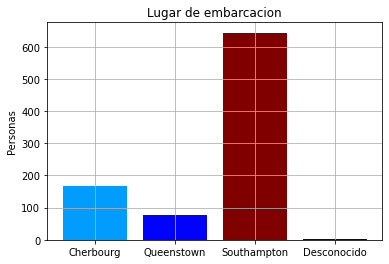

In [18]:
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=600)

names = ['Cherbourg', 'Queenstown', 'Southampton', 'Desconocido']


plt.bar( names , embar_number_place,  color=my_cmap(my_norm(embar_number_place)))
plt.title('Lugar de embarcacion')
plt.ylabel('Personas')
plt.grid()
plt.show()

<div class="alert alert-success">
 <ul>
  <li> 6. ¿Cuál hubiera sido la ganancia total? Considere que el día del embarque se le pedía un impuesto a cada tripulante dependiendo de su clase (3era = 0.5 pounds, 2da = 15 pounds, 1era=40 pounds).  Defina una función llamada conversión que reciba dos parámetros (la clase y el costo del ticket) y  regrese el costo actual (USD). Exprese su resultados en USD  </li>
</ul> 

</div>

In [19]:
def conversion(Clase, costo):
    precio_final_dollar = 0
    inflation_rate_pound = 116.81
    exchange_rate_dollar = 1.38 

    if Clase == 1:
        precio_final_dollar = (costo + 40) * inflation_rate_pound * exchange_rate_dollar
    elif Clase == 2:
        precio_final_dollar = (costo + 15) * inflation_rate_pound * exchange_rate_dollar
    elif Clase == 3:
        precio_final_dollar = (costo + 0.5) * inflation_rate_pound * exchange_rate_dollar
    
    return precio_final_dollar

total_gains_dollars = 0
index = 0

for i in titanic_data['Fare']: 
    price = float(i)
    total_gains_dollars = total_gains_dollars + conversion(int(titanic_data['Pclass'][index]), price)
    index = index + 1

print('La ganancia por los tickets, a valor moderno del dolar, fue de {:.2f}'.format(total_gains_dollars))


La ganancia por los tickets, a valor moderno del dolar, fue de 6502630.48


<div class="alert alert-success">

 <ul>
  <li>7. ¿Cuál es la distribución por edad de los pasajeros de manera general, así como para hombres y mujeres? (Usando histogramas)</li>
</ul> 

</div>

In [20]:
index = 0



edades_male = []

edades_female = []

group_ages = ['0-19', '20-39', '40-69', '70+']


for i in titanic_data['Sex']:
    try:
        edad = float(titanic_data['Age'][index])
        if i == 'male':
            edades_male.append(edad)
        elif i == 'female':
            edades_female.append(edad)
    except ValueError:
        if i == 'male':
            edades_male.append(29)
        elif i == 'female':
            edades_female.append(29)
    index = index + 1



<div class="alert alert-success">
 
  Histograma de las edades de los hombres
</div>

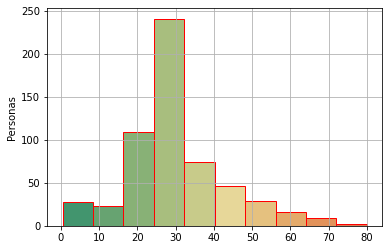

In [21]:
list_colors = ['#42956e', '#67a371', '#88b176' , '#a8be7e', '#c8cb8a', '#e7d799', '#e5c17f', '#e4aa6a', '#e2925a', '#e07851']

rect,bins, patches = plt.hist( edades_male, edgecolor= 'red')

for i in range(len(rect)):
    c = list_colors[i]
    patches[i].set_fc(c)


plt.title('')
plt.ylabel('Personas')
plt.grid()
plt.show()

<div class="alert alert-success">
 
  Histograma de las edades de las mujeres
</div>

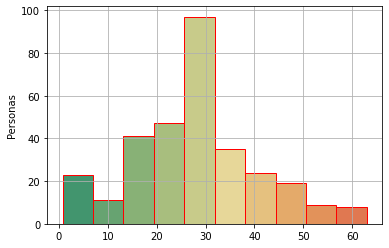

In [22]:
rect,bins, patches = plt.hist( edades_female, edgecolor= 'red')

for i in range(len(rect)):
    c = list_colors[i]
    patches[i].set_fc(c)

plt.title('')
plt.ylabel('Personas')
plt.grid()
plt.show()

<div class="alert alert-success">
 
 <ul>
  <li> 8. ¿Cómo difiere la tasa de supervivencia entre las diferentes clases del Titanic?</li>
</ul> 

</div>

In [23]:
index  = 0

class_1_surv_count = 0
class_2_surv_count = 0
class_3_surv_count = 0

class_1 = 0
class_2 = 0
class_3 = 0

class_vector = [0,0,0]
class_vector_surv = [0,0,0]


for i in titanic_data['Pclass']:
    if i == "1":
        class_1 = class_1 + 1
        class_vector[0] = class_1
    elif i == "2":
        class_2 = class_2 + 1
        class_vector[1] = class_2
    elif i == "3":
        class_3 = class_3 + 1
        class_vector[2] = class_3


for i in titanic_data['Survived']:
    if i == '1':
        survi_class = int(titanic_data['Pclass'][index])
        if survi_class == 1:
            class_1_surv_count = class_1_surv_count + 1
            class_vector_surv[0] = class_1_surv_count
        elif survi_class == 2:
            class_2_surv_count = class_2_surv_count + 1
            class_vector_surv[1] = class_2_surv_count
        elif survi_class == 3:
            class_3_surv_count = class_3_surv_count + 1
            class_vector_surv[2] = class_3_surv_count

    index = index +1

porcentages_vector = [0,0,0]

for i in range(len(class_vector)):
    porcentages_vector[i] = class_vector_surv[i]/class_vector[i] * 100

print('La tasa de sobrevivencia por clase fue de {:.2f}% a la primera clase'.format(porcentages_vector[0]))
print('{:.2f}% a la de segunda clase'.format(porcentages_vector[1]))
print('{:.2f}% a la de tercera clase'.format(porcentages_vector[2]))

La tasa de sobrevivencia por clase fue de 62.96% a la primera clase
47.28% a la de segunda clase
24.24% a la de tercera clase


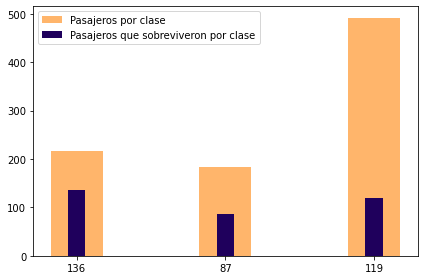

In [24]:
ind = [1,2,3]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=ind, height=class_vector, width=0.35,align= 'center', color = '#ffb56b', label='Pasajeros por clase')
ax.bar(x=ind, height=class_vector_surv, width=0.35/3,  align='center', color = '#1f005c',label='Pasajeros que sobreviveron por clase')
plt.legend()
plt.xticks(ind, class_vector_surv)
plt.tight_layout()
plt.show()



<div class="alert alert-warning">

**Todas las funciones necesarias para analizar datos como los del ejemplo anterior, se explicarán a lo largo de esta unidad dedicada a la librería Pandas**

</div>

<img align="left" width="800"  float= "none" align="middle" src="figuras/titanic2.png">